# Text Representation with Feature Engineering

###Exploring Word Embeddings with New Deep Learning Models

We have discussed in the previous sub-unit that Feature Engineering is the secret sauce to creating superior and better performing machine learning models. 

Traditional (count-based) feature engineering strategies for textual data involve models belonging to a family of models popularly known as the Bag of Words model. This includes term frequencies, TF-IDF (term frequency-inverse document frequency), N-grams and so on. While they are effective methods for extracting features from text, due to the inherent nature of the model being just a bag of unstructured words, we lose additional information like the semantics, structure, sequence and context around nearby words in each text document. 

This forms as enough motivation for us to explore more sophisticated models which can capture this information and give us features which are vector representation of words, popularly known as embeddings.

Here we will explore the following feature engineering techniques:

- Word2Vec
- GloVe
- FastText

Predictive methods like Neural Network based language models try to predict words from its neighboring words looking at word sequences in the corpus and in the process it learns distributed representations giving us dense word embeddings. We will be focusing on these predictive methods in this article.

In [ ]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

## Word2vec
- Was created by Google - 2013
- They give continuous dense vector representation of each words 
- Dense vector representation - Help you to derive the contextual and semantic simarity!
- These models take in massive corpus, Create A vocab - and generate dense word embeddings! 


In [ ]:
import nltk 
from gensim.models import word2vec

In [ ]:
#Context words for the single word
Indian ___________ is not a Monarchy but Republican
1. Government
2. Democracy 
3. Constitution 
4. Governance

In [11]:
tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

#Setting values for various params 
feature_size = 15 # Word Vector dimensionality (300)
window_size = 20 # context window size 
min_word_count = 1 #This a way to remove infrequent words (Min number of occurence in the no. of docs)
sample = 1e-3  #1x10^-3 #Downsample frequent words or randomly drop some frequently occuring words
sg = 1 # 1 - for CBOW 

w2v_model = word2vec.Word2Vec(tokenized_corpus, size = feature_size,window = window_size, min_count = min_word_count,sample =sample,sg = sg,iter = 5000)

w2v_model

In [ ]:
w2v_model['dog']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.30798796,  0.55466413, -0.47286215, -0.5430432 , -1.2323371 ,
        1.1574123 , -0.51407427,  0.17141826,  0.5427381 ,  0.9661018 ,
        0.2538087 , -0.28390467, -0.85217625, -0.45340708,  0.5800874 ],
      dtype=float32)

Dimensionality Reduction - Reducing Multi-dimentional vector into two or more dimentions for human understanding

## t-SNE
t-Distributed Stochastic Neighor Embedding 
A non linear - Dimentionality Reduction alogrithm. 
We use htis for exploring high-dimensional Data. 

In [ ]:
#Impementation + Break till 10:40am IST
import matplotlib.pyplot as plt
%matplotlib inline 

#Visualize the Embeddings 
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word #GEt me all the unique words form the index
wvs = w2v_model.wv[words] #GEt me the word embeddings of the same 

tsne = TSNE(n_components=2, random_state = 42, n_iter = 5000, perplexity =5)
np.set_printoptions(suppress= True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize= (12,6))
plt.scatter(T[:,0],T[:,1],c= 'orange',edgecolors = 'r')
for label, x,y in zip(labels,T[:,0],T[:,1]):
  plt.annotate(label,xy = (x+1,y+1),xytext=(0,0),textcoords = 'offset points')

In [ ]:
import numpy as np 
from sklearn.metrics.pairwise import cosine_similarity

vec_df = pd.DataFrame(wvs, index = words)
similarity_matrix = cosine_similarity(vec_df)

similarity_df = pd.DataFrame(similarity_matrix, index = words, columns = words)
similarity_df

In [20]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]],axis = 1) #Sorts the resultant array or datastructure and returns the index of 'n' largest values

sky           [beautiful, today, blue]
blue           [today, sky, beautiful]
beautiful           [today, sky, blue]
quick                [fox, dog, jumps]
brown               [jumps, lazy, dog]
fox                [quick, dog, jumps]
lazy             [brown, jumps, quick]
dog                [quick, fox, jumps]
love                [green, eggs, ham]
sausages            [eggs, ham, beans]
ham            [eggs, beans, sausages]
bacon           [beans, sausages, ham]
eggs            [ham, sausages, beans]
jumps              [brown, quick, dog]
kings        [toast, beans, breakfast]
breakfast        [beans, toast, kings]
toast        [kings, beans, breakfast]
beans        [kings, toast, breakfast]
green            [ham, eggs, sausages]
today           [beautiful, sky, blue]
dtype: object

## GloVe Model 
Global Vectors 
- Just like Word2vec in terms where both are unsupervised methods to get word vectors 
- The training is different - an Aggregated global word-word-co-occurence matrix Word Context(WC), Word-Feature(WC) and Feature-Context(FC) 
WC = WF X FC
- WF - The Word embeddings of each words and F- The number of Features 

In [ ]:
!python -m spacy download en 

In [28]:
!python -m spacy download en_vectors_web_lg

In [ ]:
!python -m spacy download en_core_web_sm

In [25]:
import spacy 
import en_core_web_sm

In [31]:
nlp = en_core_web_sm.load()
total_vectors = len(nlp.vocab.vectors)

In [33]:
unique_words = list(set([word for sublist in tokenized_corpus for word in sublist]))

In [ ]:
word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
vec_df = pd.DataFrame(word_glove_vectors, index = unique_words)
vec_df

In [40]:
vec_df.shape

(20, 96)

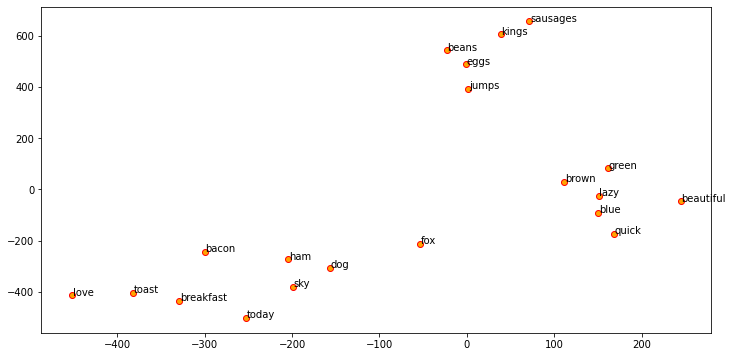

In [37]:
tsne = TSNE(n_components=2, random_state = 42, n_iter = 5000, perplexity =3)
np.set_printoptions(suppress= True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize= (12,6))
plt.scatter(T[:,0],T[:,1],c= 'orange',edgecolors = 'r')
for label, x,y in zip(labels,T[:,0],T[:,1]):
  plt.annotate(label,xy = (x+1,y+1),xytext=(0,0),textcoords = 'offset points')

In [38]:
import numpy as np 
from sklearn.metrics.pairwise import cosine_similarity

vec_df = pd.DataFrame(word_glove_vectors, index = words)
similarity_matrix = cosine_similarity(vec_df)

similarity_df = pd.DataFrame(similarity_matrix, index = words, columns = words)
similarity_df

,sky,blue,beautiful,quick,brown,fox,lazy,dog,love,sausages,ham,bacon,eggs,jumps,kings,breakfast,toast,beans,green,today
sky,1.000000,0.527333,0.516764,0.515219,0.519828,0.508549,0.495516,0.594161,0.555452,0.745211,0.763424,0.772422,0.321150,0.576281,0.543625,0.565894,0.530299,0.591834,0.615924,0.726582
blue,0.527333,1.000000,0.690175,0.420463,0.625759,0.638263,0.604946,0.561259,0.408377,0.533406,0.486819,0.608792,0.430087,0.460211,0.401223,0.461211,0.322461,0.705318,0.628965,0.524099
beautiful,0.516764,0.690175,1.000000,0.477329,0.579054,0.570113,0.562909,0.414357,0.199178,0.452891,0.489577,0.593602,0.393629,0.377926,0.426063,0.326414,0.316652,0.642526,0.598124,0.395760
quick,0.515219,0.420463,0.477329,1.000000,0.355131,0.388902,0.450955,0.365622,0.511546,0.425696,0.462530,0.483375,0.127107,0.669251,0.707955,0.107813,0.706464,0.434397,0.368668,0.355140
brown,0.519828,0.625759,0.579054,0.355131,1.000000,0.748690,0.757307,0.606048,0.397911,0.538320,0.456265,0.549358,0.522672,0.315877,0.472898,0.410801,0.312564,0.703564,0.623381,0.418655
fox,0.508549,0.638263,0.570113,0.388902,0.748690,1.000000,0.820715,0.673041,0.392987,0.603607,0.477682,0.593724,0.357052,0.453686,0.437363,0.493522,0.383424,0.640810,0.669061,0.481071
lazy,0.495516,0.604946,0.562909,0.450955,0.757307,0.820715,1.000000,0.663778,0.438804,0.551850,0.479007,0.548770,0.309739,0.430306,0.497377,0.416186,0.405406,0.636966,0.629147,0.540769
dog,0.594161,0.561259,0.414357,0.365622,0.606048,0.673041,0.663778,1.000000,0.573179,0.651253,0.640425,0.611805,0.304698,0.501605,0.435010,0.605885,0.376884,0.578065,0.602545,0.624823
love,0.555452,0.408377,0.199178,0.511546,0.397911,0.392987,0.438804,0.573179,1.000000,0.506320,0.450206,0.450332,0.153828,0.566325,0.429392,0.337850,0.538269,0.423305,0.491845,0.558546
sausages,0.745211,0.533406,0.452891,0.425696,0.538320,0.603607,0.551850,0.651253,0.506320,1.000000,0.677921,0.758695,0.303844,0.578035,0.548334,0.577141,0.449643,0.638667,0.558848,0.708406


## FastText Model 
- was introduced by Facebook - 2016  
- As extension for Word2vec
- Subword Model - Considers each word as Bag of Character n-grams
- n=3 (tri - Gram) - Character level trigram - where < wh,whe,her,ere,re> and a special sequence < where > 

In [41]:
from gensim.models.fasttext import FastText

#Setting values for various params 
feature_size = 15 # Word Vector dimensionality (300)
window_size = 20 # context window size 
min_word_count = 1 #This a way to remove infrequent words (Min number of occurence in the no. of docs)
sample = 1e-3  #1x10^-3 #Downsample frequent words or randomly drop some frequently occuring words
sg = 1 # 1 - for CBOW 

ft_model = FastText(tokenized_corpus, size = feature_size,window = window_size, min_count = min_word_count,sample =sample,sg = sg,iter = 5000)
ft_model

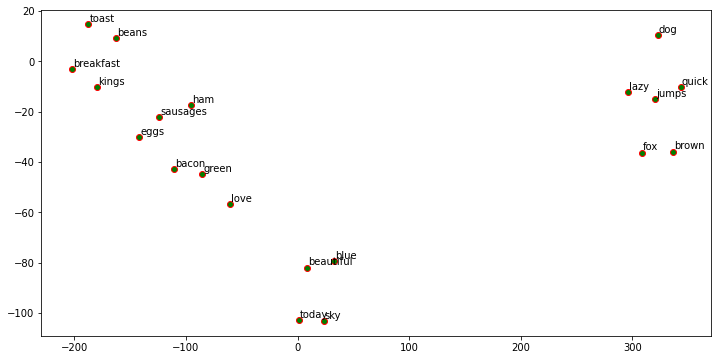

In [43]:
#Impementation + Break till 10:40am IST
import matplotlib.pyplot as plt
%matplotlib inline 

#Visualize the Embeddings 
from sklearn.manifold import TSNE

words = ft_model.wv.index2word #GEt me all the unique words form the index
wvs = ft_model.wv[words] #GEt me the word embeddings of the same 

tsne = TSNE(n_components=2, random_state = 42, n_iter = 5000, perplexity =5)
np.set_printoptions(suppress= True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize= (12,6))
plt.scatter(T[:,0],T[:,1],c= 'green',edgecolors = 'r')
for label, x,y in zip(labels,T[:,0],T[:,1]):
  plt.annotate(label,xy = (x+1,y+1),xytext=(0,0),textcoords = 'offset points')

In [44]:
def average_word_vectors(words,model, vocabulary, num_features):
  feature_vector = np.zeros((num_features,),dtype= 'float64')
  nwords=0
  for word in words:
    if word in vocabulary: 
      nwords = nwords+1
      feature_vector = np.add(feature_vector,model.wv[word])
  if nwords: 
    feature_vector = np.divide(feature_vector,nwords)

  return feature_vector

def averaged_word_vectorizer(corpus,model,num_features):
  vocabulary = set(model.wv.index2word)
  features = [average_word_vectors(tokenized_sentence,model,vocabulary, num_features) for tokenized_sentence in corpus]
  return np.array(features)

In [45]:
#Document vectors 
ft_doc_features = averaged_word_vectorizer(corpus = tokenized_corpus, model = ft_model,num_features = feature_size)
pd.DataFrame(ft_doc_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.017834,1.219471,-0.471404,0.100632,-0.485411,-0.580870,-0.183611,-0.032766,-0.266565,0.289460,0.074620,0.748789,-0.517958,0.038283,-0.297274
1,-1.051389,0.996752,-0.461333,0.187398,-0.399002,-0.535357,-0.133190,-0.102741,-0.235152,0.255751,0.070397,0.575714,-0.376731,0.007694,-0.241070
2,-0.080685,1.394714,1.015425,0.091486,-1.111383,-0.360878,-0.166006,0.346778,-0.375867,0.003422,0.676978,-0.001734,-0.380349,0.563245,0.395930
3,-1.443467,0.329564,-0.008377,1.037905,-0.312026,-0.233052,0.184552,-0.440906,-0.320137,-0.371566,0.666171,-0.895322,0.647324,-0.199162,-0.239623
4,-1.307474,0.324607,-0.140498,0.826300,-0.173477,-0.265190,0.072099,-0.486643,-0.283610,-0.157870,0.412292,-0.508161,0.427139,-0.166446,-0.225815
5,-0.189542,1.352578,0.803024,0.068530,-1.020865,-0.378753,-0.193295,0.301214,-0.350197,0.057726,0.584805,0.126631,-0.409361,0.484519,0.307555
6,-1.085396,1.229123,-0.536072,0.100034,-0.476581,-0.611018,-0.181043,-0.026112,-0.259882,0.283033,0.046487,0.772775,-0.532793,0.030967,-0.318839
7,-0.088025,1.415853,1.003639,0.080209,-1.119665,-0.375660,-0.176112,0.350506,-0.377900,0.002104,0.662523,0.023472,-0.398187,0.561428,0.385074


In [45]:
#Generate Seperate Embeddings for train and test
avf_wv_Train = averaged_word_vectorizer(train _ PArams)
avf_wv_Test = averaged_word_vectorizer(test _ PArams)

In [ ]:
dnn_model = Sequential()
dnn_model.add(Dense(512, input_shape = (feature_size)))



In [ ]:
#compile your model

In [ ]:
#Fit 